#### TODO's
 * Import data &#10004;
 * Learn Question / Variable Mapping. &#10004;
 * Code Membership and Unify vars as original paper &#10004;
 * Extract and Code on :
     * v563 Common Defense &#10004;
     * v566 Common Foreign Policy &#10004;
     * v565 Single Currency &#10004;
     * v567 European Government &#10004;
 * Create 'Policy' variable. (Sum of positive answers to above 4 questions.) &#10004;
 * Get weighted corellation coefficients between policy vars. &#10004;
 * Create Table 1

In [1]:
%pylab inline
# Allow inline Images. 
from IPython.display import Image 

import pandas
import numpy as np
# For Weighted Correlation
from statsmodels.stats.weightstats import DescrStatsW

# Disable warnings
pandas.set_option('chained_assignment',None)


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Eurobarometer 30 (Oct-Nov 1988)
data = pandas.read_stata("ZA1715_v1-0-1.dta")

    

#### Dependent Variable

Researchers identified the following two Eurobarometer survey questions as general indicators of support for integration:

(v521) Membership: Generally speaking, do you think that (your country's) membership in the European Community (Common Market) is a bad thing (1), neither good nor bad (2), or a good thing (3)?

(v520) Unify: In general, are you for or against efforts being made to unify Western Europe? very much against (1); somewhat against (2); somewhat for (3); very much for (4).

Membership: Responses of "don't know" were excluded from the analysis since respondents could express indifference through the intermediate category. 

Note that the inclusion of the "don't know" responses as an intermediate category did not alter the results reported in tables 1 and 2. 

Unify : Responses of "don't know" were coded as 2.5.



In [3]:
membership_and_unify = data[['v521','v520']]
membership_and_unify.columns = [
    'membership',
    'unify']

def classify_membership(x):
    if x["membership"] == 'BAD THING':
        return 1
    if x["membership"] == 'NEITHER NOR':
        return 2
    if x["membership"] == 'GOOD THING':
        return 3

def classify_unify(x):
    if x["unify"] == 'AGAINST VERY MUCH':
        return 1
    if x["unify"] == 'AGAINST TO SOME EXT':
        return 2
    if x["unify"] == 'FOR TO SOME EXTENT':
        return 3
    if x["unify"] == 'FOR VERY MUCH':
        return 4
    else:
        # NaN coded as 'Don't Know'.
        return 2.5

# For every row in mmebership_and_unify return 'type'. Use any function in place of type.
# membership_and_unify.apply(type,axis=1)

# Put the output from classify_membership(row) into that row's mem_numerical column!
membership_and_unify['mem_numerical'] = membership_and_unify.apply(classify_membership, axis=1)
membership_and_unify['unify_numerical'] = membership_and_unify.apply(classify_unify, axis=1)


The variables we want to compare are:
* v563 Common Defense
* v566 Common Foreign Policy 
* v565 Single Currency 
* v567 European Government

Column data (vXXX) Taken from "http://localhost:8888/files/09321-0001-Questionnaire.pdf"

In [4]:
# Import the data into a new data frame and give saner column names.
Table1_Data = data[['v5','v6','v7','v8','v9','v563','v565','v566','v567']]
Table1_Data.columns = [
    'Nation_1',                                                                 
    'Weight_1',                                                                 
    'Nation_2',                                                         
    'Weight_2',                                                                 
    'European_Weight',                                                          
    'Common_Defense',                                                           
    'Single_Currency',                                                          
    'Common_Foreign_Policy',                                                    
    'European_Government']



From Footnote 11, Page 341

'Each of the four question asked the respondent if she were for or against implementing the par-
ticular proposal between the twelve countries of the EC by 1992. I coded a response of "against" as
(0), "don't know" as (0.5), and "for" as (1).

Need to recode data as:

* "for" as (1)
* "against" (0) 
* "don't know" (0.5

In [5]:
def classify_Common_Defense(x):
    if x["Common_Defense"] == 'FOR':
        return 1
    if x["Common_Defense"] == 'AGAINST':
        return 0
    else:
        # NaN coded as "Don't Know".
        return .5

Table1_Data['Common_Defense_Numerical'] = Table1_Data.apply(classify_Common_Defense, axis=1)


In [6]:
def classify_Single_Currency(x):
    if x["Single_Currency"] == 'FOR':
        return 1
    if x["Single_Currency"] == 'AGAINST':
        return 0
    else:
        # NaN coded as "Don't Know".
        return .5

Table1_Data['Single_Currency_Numerical'] = Table1_Data.apply(classify_Single_Currency, axis=1)


In [7]:
def classify_Common_Foreign_Policy(x):
    if x["Common_Foreign_Policy"] == 'FOR':
        return 1
    if x["Common_Foreign_Policy"] == 'AGAINST':
        return 0
    else:
        # NaN coded as "Don't Know".
        return .5

Table1_Data['Common_Foreign_Policy_Numerical'] = Table1_Data.apply(classify_Common_Foreign_Policy, axis=1)


In [8]:
def classify_European_Government(x):
    if x["European_Government"] == 'FOR':
        return 1
    if x["European_Government"] == 'AGAINST':
        return 0
    else:
        # NaN coded as "Don't Know".
        return .5

Table1_Data['European_Government_Numerical'] = Table1_Data.apply(classify_European_Government, axis=1)


#### Create 'Policy' Var.

"I combined responses to these variables to construct an index of support for integrative policies ranging from 0 (against all proposals) to 4 (support all proposals). This index, called Policy, is highly correlated with each of the four questions (see Table 1)."


In [9]:
def policy_var(x):        
    policy_score = 0                                                            
    policies = [                  
        'Common_Defense',         
        'Single_Currency',                                                      
        'Common_Foreign_Policy',                                                
        'European_Government']                                                  
    for policy in policies:                                                     
        if x[policy] == 'FOR':                                                  
            policy_score += 1
    return policy_score

Table1_Data['Policy'] = Table1_Data.apply(policy_var, axis=1)

#### Corellations between Vars and Policy.
To do this we need the european weighting from Footnote 12: 
In calculating the correlations, national weights were applied to all observations so as to provide
a representative sample of the EU population. In addition, an identical analysis was conducted that
excluded all responses of "don't know". The results were very similar to those presented here. In in-
terpreting the correlations, remember that discrete variables allow only a crude representations of the
actual continuum of responses to each question. This tends to attenuate the magnitude of the corre-
lations among the variables (Kim and Mueller 1978, 74).

From the codebook:

5  NATION I (UK As one variable.)            
6  NATION WEIGHT I                                         
7  NATION II (NI and GB separated.)                          
8  NATION WEIGHT II                                        
9  EUROPEAN WEIGHT

(We likely only need 9, but it's easier to leave the rest in our set for now.)

In [68]:
# DataFrame.corr(method='pearson', min_periods=1)

# Table1_Data.corr(method='pearson')
c_list = [u'Common_Defense_Numerical',
          u'Common_Foreign_Policy_Numerical',
          u'Single_Currency_Numerical', 
          u'European_Government_Numerical', 
          u'Policy']

# c_list = [u'Single_Currency_Numerical', u'European_Government_Numerical']

# Pandas supports direct corellation, but not weighted. 
Table1_Data[c_list].corr(method='pearson')

Common_Defense_Numerical  \
Common_Defense_Numerical                         1.000000   
Common_Foreign_Policy_Numerical                  0.347149   
Single_Currency_Numerical                        0.236571   
European_Government_Numerical                    0.337924   
Policy                                           0.613191   

                                 Common_Foreign_Policy_Numerical  \
Common_Defense_Numerical                                0.347149   
Common_Foreign_Policy_Numerical                         1.000000   
Single_Currency_Numerical                               0.384782   
European_Government_Numerical                           0.394526   
Policy                                                  0.680180   

                                 Single_Currency_Numerical  \
Common_Defense_Numerical                          0.236571   
Common_Foreign_Policy_Numerical                   0.384782   
Single_Currency_Numerical                         1.000000   
European_Government_Numerical                     0.379253   
Policy                                            0.639737   

                                 European_Government_Numerical    Policy  
Common_Defense_Numerical                              0.337924  0.613191  
Common_Foreign_Policy_Numerical                       0.394526  0.680180  
Single_Currency_Numerical                             0.379253  0.639737  
European_Government_Numerical                         1.000000  0.665123  
Policy                                                0.665123  1.000000

In [69]:
# Setup Data for weighted correlation. 
# coded_data => Dataframe with all numerically encoded results.
# Weight_1 Eu Population Weighting. (GB Listed as one country.)

coded_data = Table1_Data[c_list]

In [72]:
print coded_data.columns
print DescrStatsW(coded_data, weights=Table1_Data.Weight_1).corrcoef
print '-'
print DescrStatsW(coded_data, weights=Table1_Data.Weight_2).corrcoef
print '-'
print DescrStatsW(coded_data, weights=Table1_Data.European_Weight).corrcoef

# Is the difference in how we treat 'Don't know'. Or no answer?

Index([u'Common_Defense_Numerical', u'Common_Foreign_Policy_Numerical',
       u'Single_Currency_Numerical', u'European_Government_Numerical',
       u'Policy'],
      dtype='object')
[[ 1.          0.34939218  0.24512869  0.3381519   0.61508106]
 [ 0.34939218  1.          0.39207402  0.39789474  0.68255058]
 [ 0.24512869  0.39207402  1.          0.38383711  0.64564721]
 [ 0.3381519   0.39789474  0.38383711  1.          0.66673889]
 [ 0.61508106  0.68255058  0.64564721  0.66673889  1.        ]]
-
[[ 1.          0.35215991  0.24794562  0.34039247  0.61782722]
 [ 0.35215991  1.          0.3838629   0.39336252  0.67996015]
 [ 0.24794562  0.3838629   1.          0.37985428  0.64256998]
 [ 0.34039247  0.39336252  0.37985428  1.          0.66525798]
 [ 0.61782722  0.67996015  0.64256998  0.66525798  1.        ]]
-
[[ 1.          0.27391596  0.20220215  0.28513099  0.574965  ]
 [ 0.27391596  1.          0.37666708  0.3758888   0.6728912 ]
 [ 0.20220215  0.37666708  1.          0.37863876  0.6

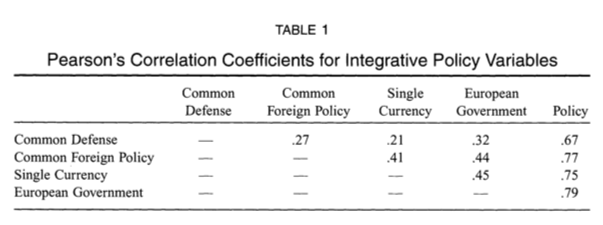

In [71]:
Image(filename='papers/Table1.png')
